In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv("../data/internet_usage.csv", parse_dates=["data"])

In [3]:
# Média móvel de 7 dias
df['mm_7d'] = df['consumo_mb'].rolling(7).mean()

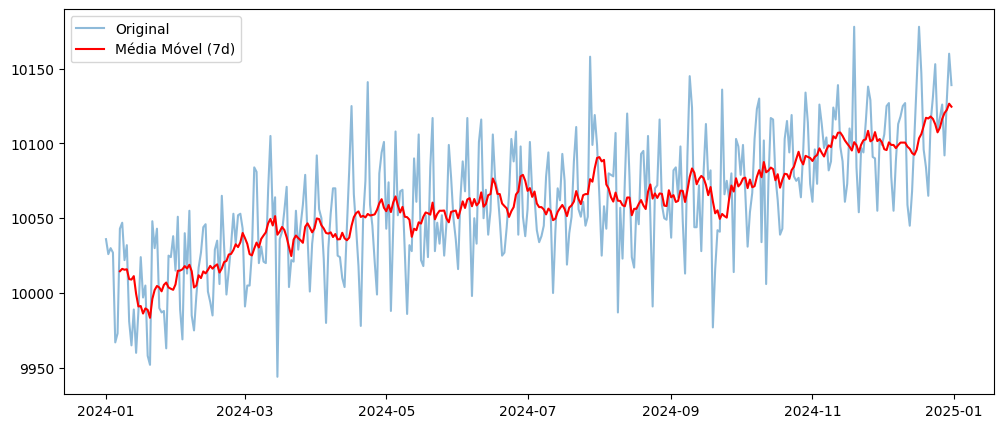

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df['data'], df['consumo_mb'], alpha=0.5, label='Original')
plt.plot(df['data'], df['mm_7d'], label='Média Móvel (7d)', color='red')
plt.legend()
plt.show()

In [5]:
# Previsão de tendência linear
df['dias'] = (df['data'] - df['data'].min()).dt.days
X = df[['dias']]
y = df['consumo_mb']
model = LinearRegression().fit(X, y)
df['tendencia_linear'] = model.predict(X)

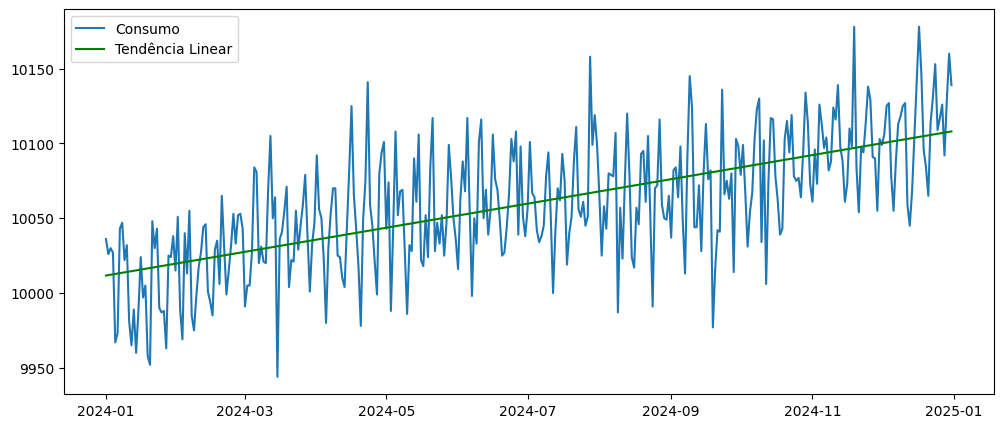

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df['data'], df['consumo_mb'], label='Consumo')
plt.plot(df['data'], df['tendencia_linear'], label='Tendência Linear', color='green')
plt.legend()
plt.show()